In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


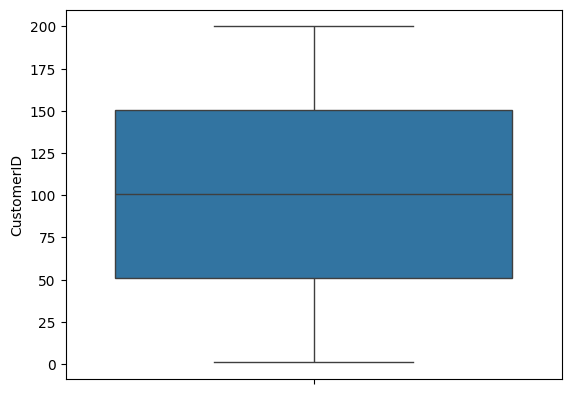

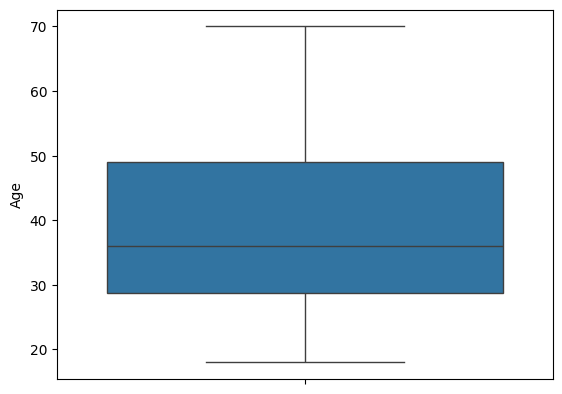

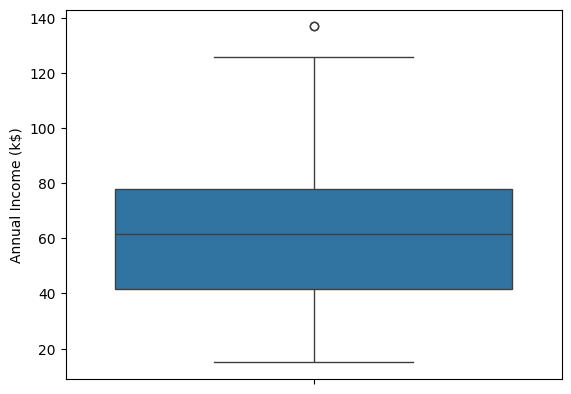

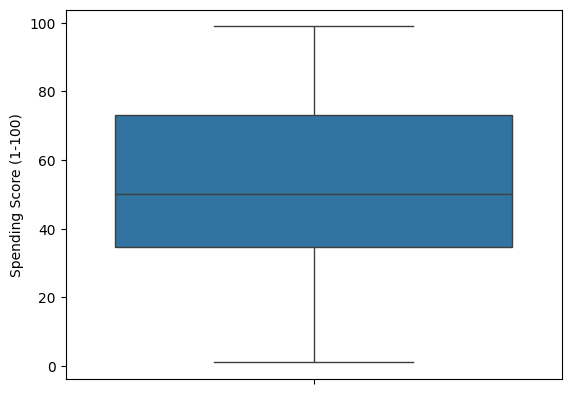

In [10]:
numeric_col = df.select_dtypes(include=np.number).columns
for i in numeric_col:
  sns.boxplot(df[i])
  plt.show()

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
lower_bound = df['Annual Income (k$)'].quantile(0.01)
upper_bound = df['Annual Income (k$)'].quantile(0.99)
df = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]

<Axes: ylabel='Annual Income (k$)'>

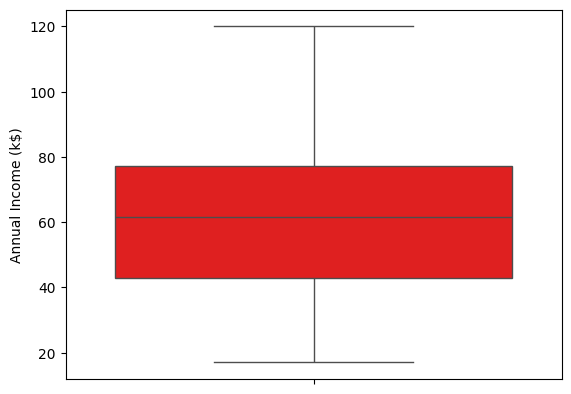

In [14]:
sns.boxplot(df['Annual Income (k$)'],color='red')

<Axes: >

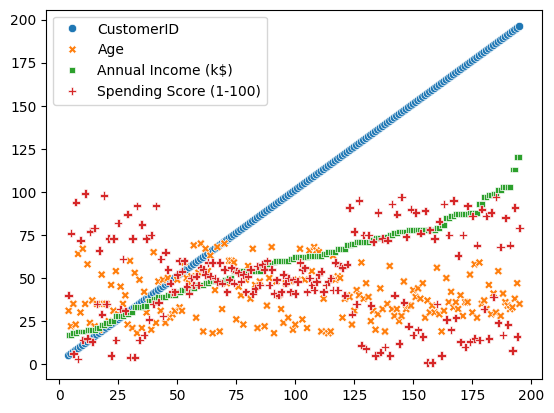

In [15]:
sns.scatterplot(df)

In [19]:
X = df.drop(columns=['CustomerID', 'Gender', 'Age'])
X

,Annual Income (k$),Spending Score (1-100)
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
...,...,...
191,103,69
192,113,8
193,113,91
194,120,16


# Within Cluster Sum of Squares (WCSS)

In [37]:
k_rng = range(1, 11)
wcss = []

for i in k_rng:
  model = KMeans(n_clusters=i, random_state=42, init='k-means++')
  model.fit(X)
  wcss.append(model.inertia_)

wcss

[234633.89583333334,
 155737.74647887348,
 112006.6186868687,
 60918.13882760314,
 34793.03568968128,
 31579.425711326305,
 26651.755074408295,
 23160.940595970937,
 20520.77252228059,
 19261.82263883071]

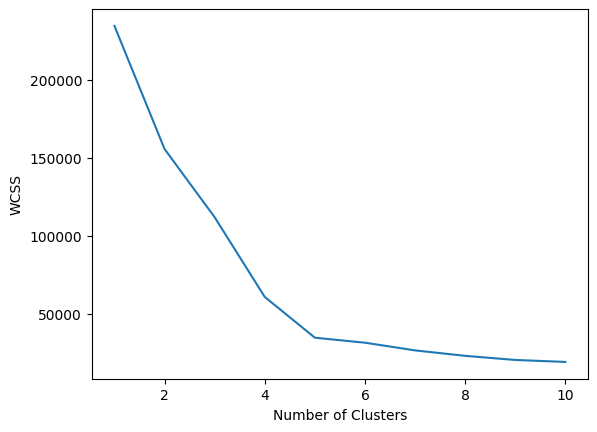

In [38]:
plt.plot(k_rng, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++')
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3], dtype=int32)

In [24]:
df['cluster'] = y_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
4,5,Female,31,17,40,2
5,6,Female,22,17,76,4
6,7,Female,35,18,6,2
7,8,Female,23,18,94,4
8,9,Male,64,19,3,2


In [25]:
df_1 = df[df['cluster']==0]
df_2 = df[df['cluster']==1]
df_3 = df[df['cluster']==2]
df_4 = df[df['cluster']==3]
df_5 = df[df['cluster']==4]

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

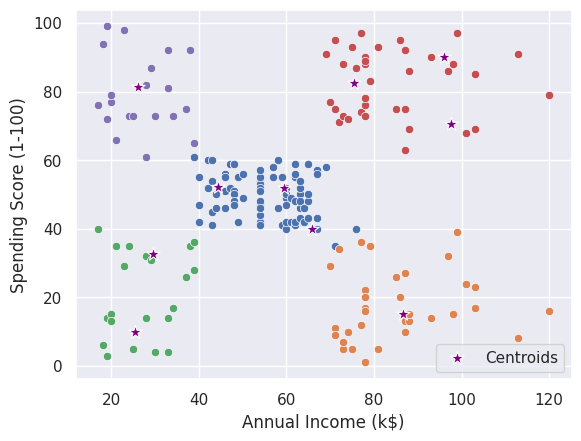

In [48]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_3)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_4)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_5)
sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1],
                color='purple', marker='*', s=100, label='Centroids')

In [27]:
scaler = MinMaxScaler()
df['Annual Income (k$)'] = scaler.fit_transform(df[['Annual Income (k$)']])
df['Spending Score (1-100)'] = scaler.fit_transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
4,5,Female,31,0.000000,0.397959,2
5,6,Female,22,0.000000,0.765306,4
6,7,Female,35,0.009709,0.051020,2
7,8,Female,23,0.009709,0.948980,4
8,9,Male,64,0.019417,0.020408,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

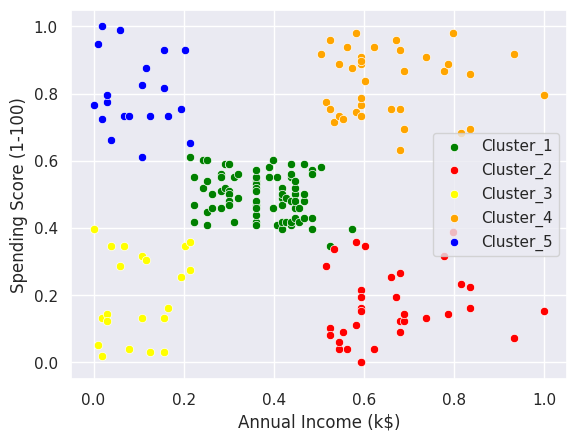

In [47]:

df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
df4 = df[df['cluster']==3]
df5 = df[df['cluster']==4]

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, label='Cluster_1',color='green')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df2, label='Cluster_2', color='red')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df3, label='Cluster_3', color='yellow')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df4, label='Cluster_4', color='orange')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df5, label='Cluster_5', color='blue')
# sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], color='black', marker='*', s=100, label='Centroids')


In [28]:
y_pred_2 = kmeans.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_pred_2

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3], dtype=int32)

In [29]:
df['cluster_2'] = y_pred_2
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster_2
4,5,Female,31,0.000000,0.397959,2,2
5,6,Female,22,0.000000,0.765306,4,4
6,7,Female,35,0.009709,0.051020,2,2
7,8,Female,23,0.009709,0.948980,4,4
8,9,Male,64,0.019417,0.020408,2,2
